In [2]:
import pandas as pd
import numpy as np
from numpy.random import randn # give me random valus in the dataframe
np.random.seed(5232) # for take the same result

# Basics Of Pandas

In [3]:
df = pd.DataFrame(randn(3,3),index=['X','Y','Z'],columns=['C1','C2','C3'])
df

,C1,C2,C3
X,0.231748,-0.183344,1.043589
Y,0.511342,-0.929544,1.352501
Z,-1.294492,-0.989464,0.482776


In [4]:
df[ ['C1','C3'] ]

,C1,C3
X,0.231748,1.043589
Y,0.511342,1.352501
Z,-1.294492,0.482776


In [7]:
df['C_4'] = df['C1']+ df['C2']

In [8]:
df.loc['Y']

C1     0.511342
C2    -0.929544
C3     1.352501
C_4   -0.418202
Name: Y, dtype: float64

In [9]:
df.iloc[1]

C1     0.511342
C2    -0.929544
C3     1.352501
C_4   -0.418202
Name: Y, dtype: float64

In [10]:
df.loc[ ['X','Z'] ]

,C1,C2,C3,C_4
X,0.231748,-0.183344,1.043589,0.048403
Z,-1.294492,-0.989464,0.482776,-2.283956


In [11]:
df.loc[ ['X','Z'] , ['C2','C3'] ]

,C2,C3
X,-0.183344,1.043589
Z,-0.989464,0.482776


In [12]:
df.loc['X','C3']

1.0435893241017995

In [13]:
df.drop('C_4',axis=1,inplace=True)

# axis = 0 row
# axis = 1 column
# implace True: will drop from the main dataframe

In [14]:
df.drop('Y', axis=0,inplace=True)
df

,C1,C2,C3
X,0.231748,-0.183344,1.043589
Z,-1.294492,-0.989464,0.482776


In [15]:
df2 = pd.DataFrame(
    randn(5,3),
    index=['A','B','C','D','E'],
    columns=['C1','C2','C3']
)

In [16]:
df.head(n=10)

,C1,C2,C3
X,0.231748,-0.183344,1.043589
Z,-1.294492,-0.989464,0.482776


In [17]:
df2

,C1,C2,C3
A,0.743386,-0.496344,-0.204262
B,0.575403,0.627185,-1.088308
C,1.066193,-0.074970,-0.063732
D,1.002485,0.330543,-0.579418
E,0.067676,0.340801,-1.099445


In [20]:
df2 <= 0

,C1,C2,C3
A,False,True,True
B,False,False,True
C,False,True,True
D,False,False,True
E,False,False,True


In [21]:
df_2 = df2[df2<=0]
df_2

,C1,C2,C3
A,NaN,-0.496344,-0.204262
B,NaN,NaN,-1.088308
C,NaN,-0.074970,-0.063732
D,NaN,NaN,-0.579418
E,NaN,NaN,-1.099445


In [22]:
df2[(df2['C3']<=0 )& (df2['C1']>=0.5)]

,C1,C2,C3
A,0.743386,-0.496344,-0.204262
B,0.575403,0.627185,-1.088308
C,1.066193,-0.074970,-0.063732
D,1.002485,0.330543,-0.579418


In [23]:
df2[(df2['C3']<=0 )| (df2['C1']>=0.5)]

,C1,C2,C3
A,0.743386,-0.496344,-0.204262
B,0.575403,0.627185,-1.088308
C,1.066193,-0.074970,-0.063732
D,1.002485,0.330543,-0.579418
E,0.067676,0.340801,-1.099445


In [24]:
df2[(df2['C3']<=0 )| (df2['C1']>=0.5)]['C2']

A   -0.496344
B    0.627185
C   -0.074970
D    0.330543
E    0.340801
Name: C2, dtype: float64

In [25]:
df3 = pd.DataFrame(
    [
        [15,32,101],
        [np.nan,46,103],
        [np.nan,52,np.nan]
    ],
    index=['A','B','C'],
    
    columns=['C1','C2','C3']
)

In [26]:
df3

,C1,C2,C3
A,15.0,32,101.0
B,NaN,46,103.0
C,NaN,52,NaN


In [27]:
df3.dropna()

,C1,C2,C3
A,15.0,32,101.0


In [28]:
df3

,C1,C2,C3
A,15.0,32,101.0
B,NaN,46,103.0
C,NaN,52,NaN


In [29]:
df3.dropna(axis=1)

,C2
A,32
B,46
C,52


In [30]:
df3.dropna(axis=1,thresh=2)
# thresh if there are nan values more than or equal 2 drop its

,C2,C3
A,32,101.0
B,46,103.0
C,52,NaN


In [34]:
df3

,C1,C2,C3
A,15.0,32,101.0
B,NaN,46,103.0
C,NaN,52,NaN


In [37]:
df3.fillna(df3['C2'].mean())

,C1,C2,C3
A,15.000000,32,101.000000
B,43.333333,46,103.000000
C,43.333333,52,43.333333


# Project Of Titanic Data set

In [19]:
df = pd.read_csv('train.csv')

In [49]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [50]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [51]:
df.shape

(891, 12)

In [52]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

df.info()

In [53]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Cleaning

In [54]:
df.drop(['Fare','Name'],axis = 1,inplace=True)

In [55]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,NaN,S
3,4,1,1,female,35.0,1,0,113803,C123,S
4,5,0,3,male,35.0,0,0,373450,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,NaN,S
887,888,1,1,female,19.0,0,0,112053,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,NaN,S
889,890,1,1,male,26.0,0,0,111369,C148,C


In [56]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [57]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,NaN,S
1,2,1,1,female,38.000000,1,0,PC 17599,C85,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,NaN,S
3,4,1,1,female,35.000000,1,0,113803,C123,S
4,5,0,3,male,35.000000,0,0,373450,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,NaN,S
887,888,1,1,female,19.000000,0,0,112053,B42,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,NaN,S
889,890,1,1,male,26.000000,0,0,111369,C148,C


# Histogram

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline # in jupyter to can use inline plot

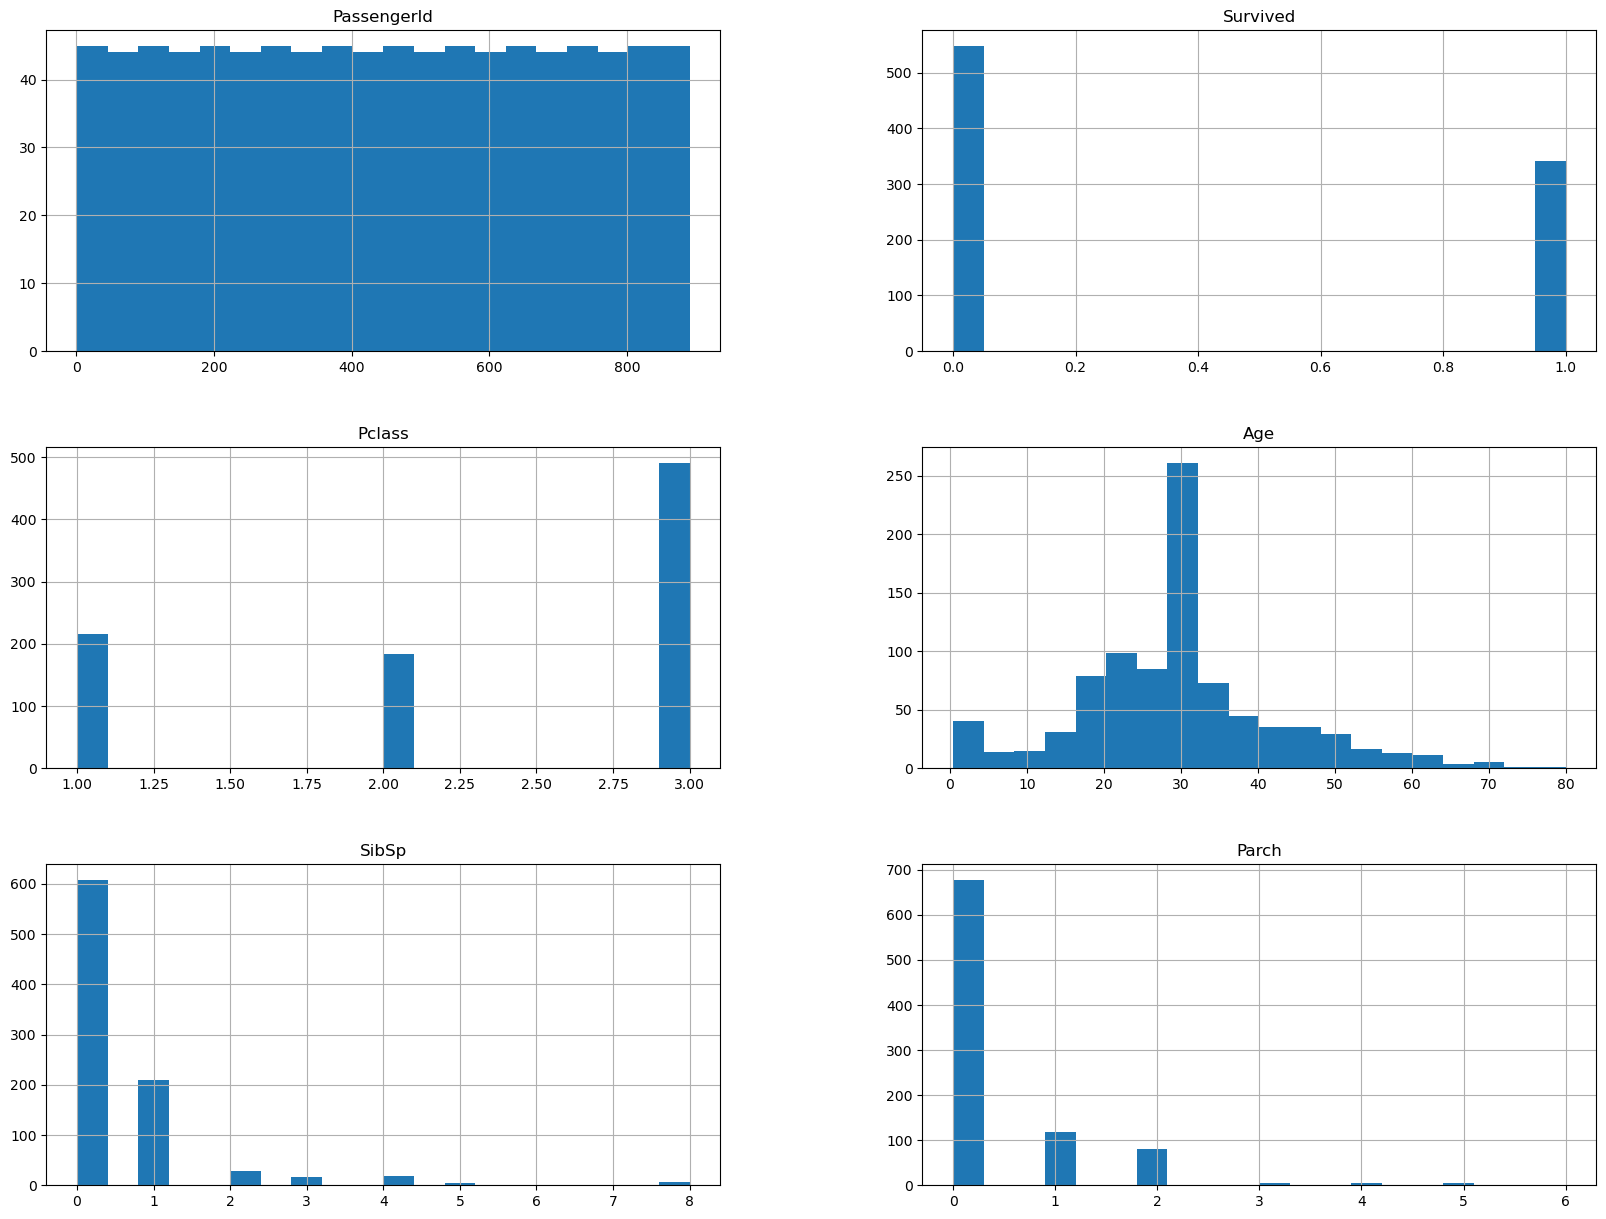

In [62]:
df.hist(figsize=(20,15),bins=20)
plt.show()

# Outliers

In [63]:
df_copy = df.copy()

In [64]:
df_copy['Age'].iloc[0:10]= 500

C:\Users\hp\AppData\Local\Temp\ipykernel_17360\2424298124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Age'].iloc[0:10]= 500


In [65]:
df_copy.head(n=15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,1,0,3,male,500.0,1,0,A/5 21171,NaN,S
1,2,1,1,female,500.0,1,0,PC 17599,C85,C
2,3,1,3,female,500.0,0,0,STON/O2. 3101282,NaN,S
3,4,1,1,female,500.0,1,0,113803,C123,S
4,5,0,3,male,500.0,0,0,373450,NaN,S
5,6,0,3,male,500.0,0,0,330877,NaN,Q
6,7,0,1,male,500.0,0,0,17463,E46,S
7,8,0,3,male,500.0,3,1,349909,NaN,S
8,9,1,3,female,500.0,0,2,347742,NaN,S
9,10,1,2,female,500.0,1,0,237736,NaN,C


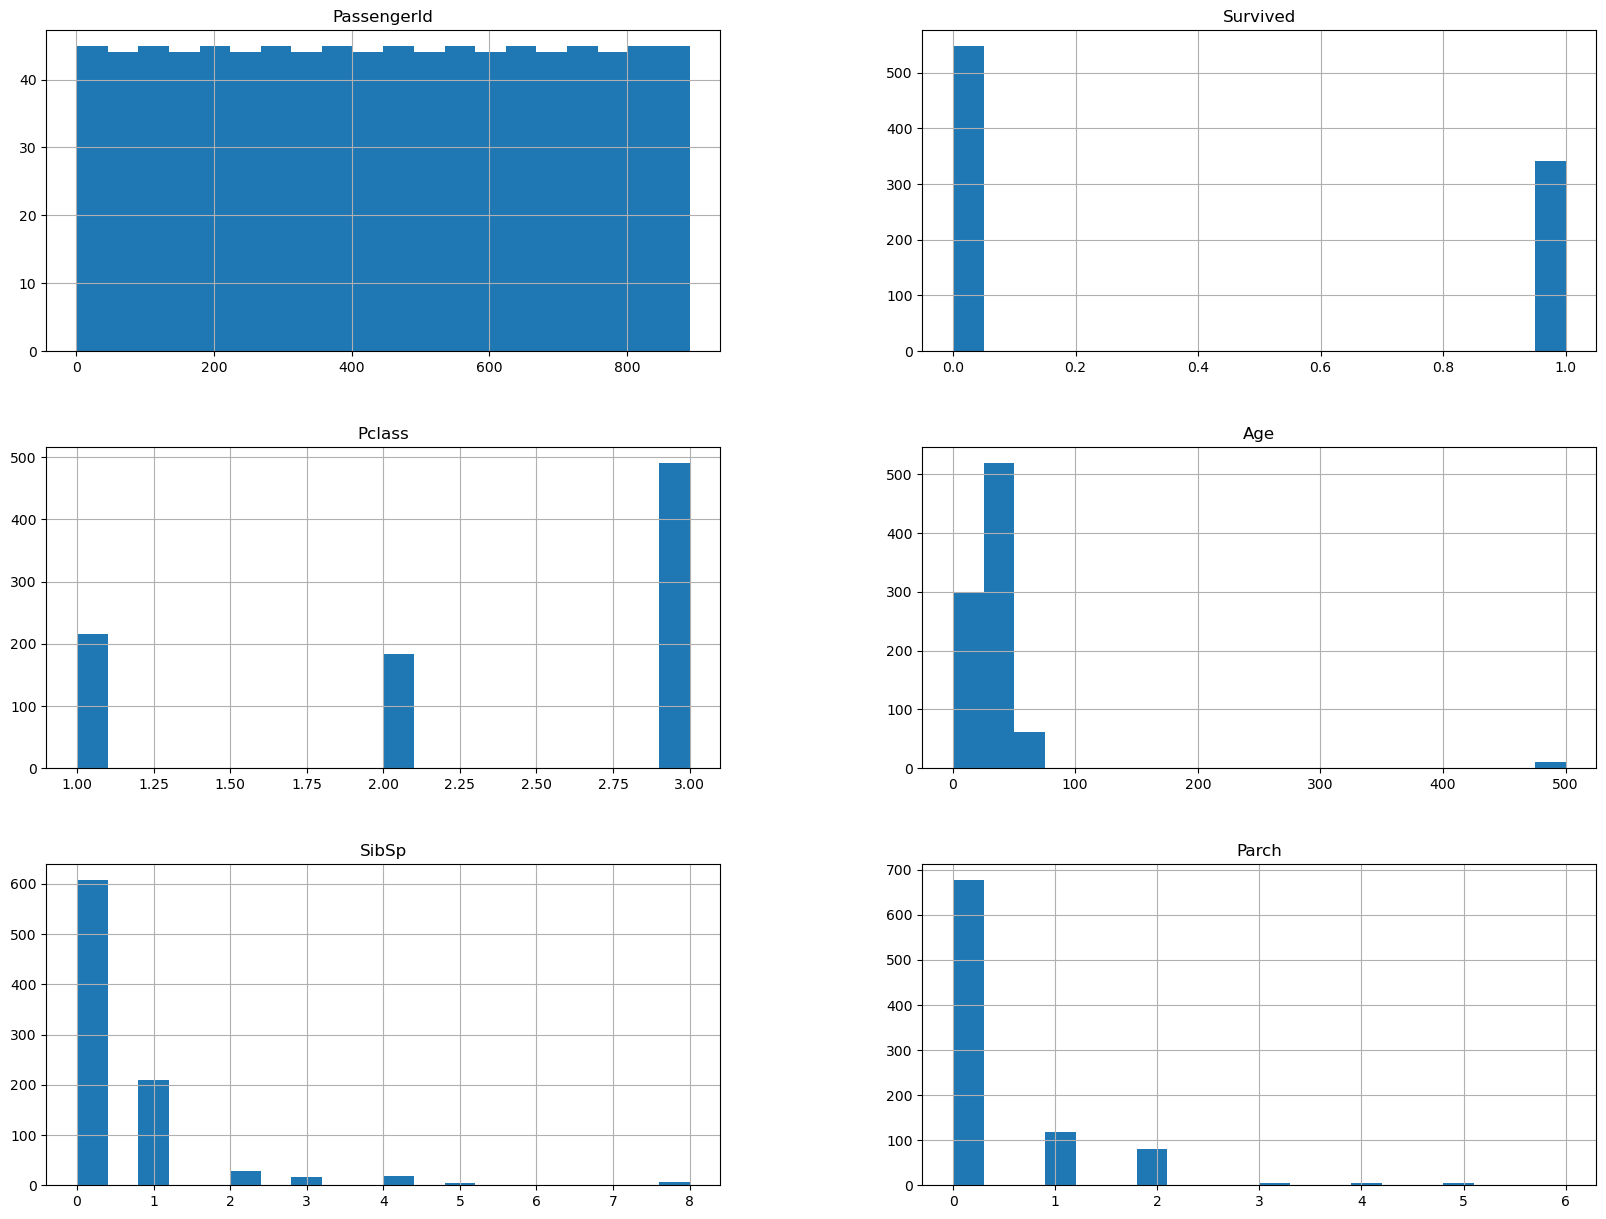

In [66]:
df_copy.hist(figsize=(20,15),bins=20)
plt.show()

In [67]:
df_copy[df_copy['Age']>100]['Age'].index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [68]:
df_copy.iloc[5]

PassengerId         6
Survived            0
Pclass              3
Sex              male
Age             500.0
SibSp               0
Parch               0
Ticket         330877
Cabin             NaN
Embarked            Q
Name: 5, dtype: object

In [70]:
df_copy.drop(df_copy[df_copy['Age']>100]['Age'].index,inplace=True)

In [71]:
df_copy

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
10,11,1,3,female,4.000000,1,1,PP 9549,G6,S
11,12,1,1,female,58.000000,0,0,113783,C103,S
12,13,0,3,male,20.000000,0,0,A/5. 2151,NaN,S
13,14,0,3,male,39.000000,1,5,347082,NaN,S
14,15,0,3,female,14.000000,0,0,350406,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,NaN,S
887,888,1,1,female,19.000000,0,0,112053,B42,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,NaN,S
889,890,1,1,male,26.000000,0,0,111369,C148,C


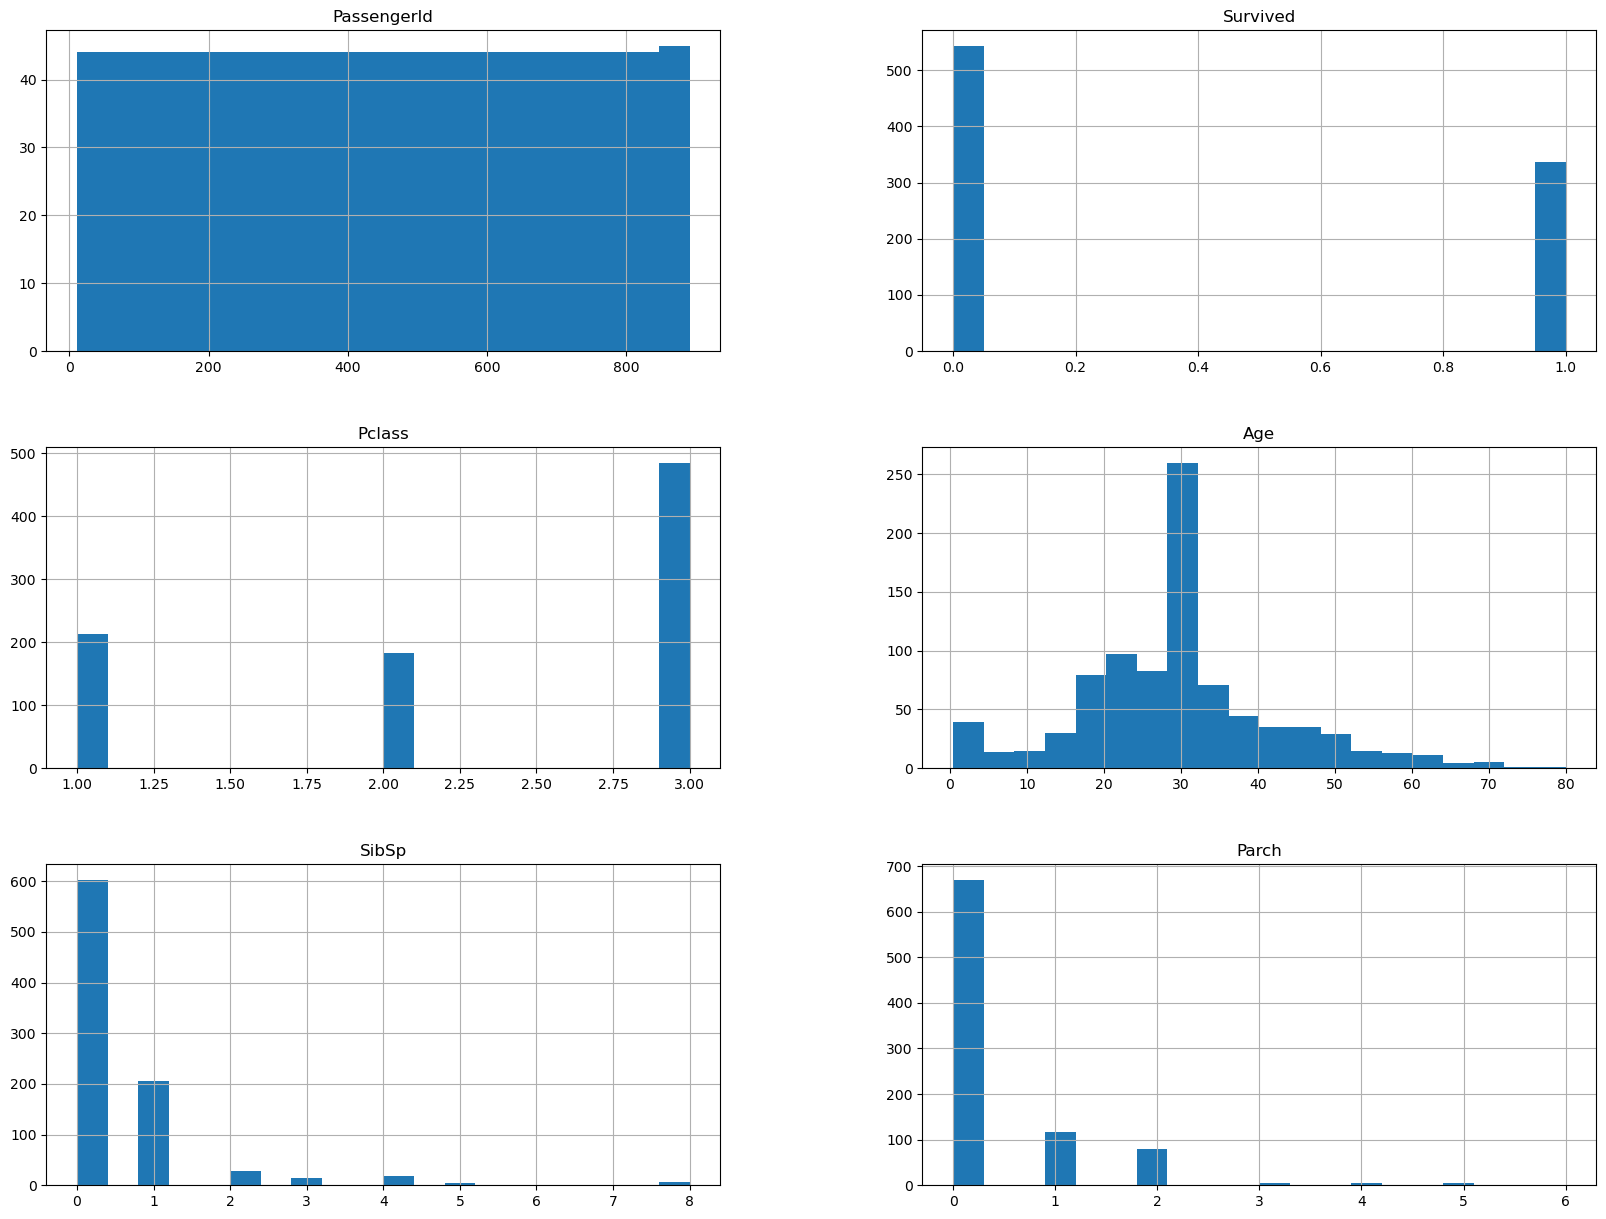

In [72]:
df_copy.hist(figsize=(20,15),bins=20)
plt.show()

# I'm Alive

In [73]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [76]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [77]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [87]:
gender_df = df[df['Sex']=='male']
survived = gender_df[gender_df['Survived']==1]
gender_df.shape
survived.shape

(109, 10)

In [88]:
gender_df.shape[0]

577

In [92]:
gender_df = df[df['Sex']=='male']
survived = gender_df[gender_df['Survived']==1]
survived_percentage = ( survived.shape[0]/gender_df.shape[0] )*100
survived_percentage

18.890814558058924

In [101]:
for gen in df['Sex'].unique():

    gender_df = df[df['Sex']==gen]
    survived = gender_df[gender_df['Survived']==1]
    survived_percentage = ( survived.shape[0]/gender_df.shape[0] )*100
    
    print(f"Servived of {gen}","%.2f" % survived_percentage,'%')
    print("Count: ",gender_df.shape[0])
    print("\n=======\n")

Servived of male 18.89 %
Count:  577


Servived of female 74.20 %
Count:  314




In [108]:
for x_class in df['Pclass'].unique():
  
    
    x_df = df[df['Pclass'] == x_class]
    
    survived = x_df[x_df['Survived']==1]
    survived_percentage = ( survived.shape[0]/x_df.shape[0] )*100
    print(f"Survived of class {x_class} :","%.2f" % survived_percentage,'%')
    print("Count: ",x_df.shape[0])
    print("\n=======\n")

Survived of class 3 : 24.24 %
Count:  491


Survived of class 1 : 62.96 %
Count:  216


Survived of class 2 : 47.28 %
Count:  184




In [110]:
def age_to_category(age):
    if age <4:
        return 0 # "baby"
    elif age < 10:
        return 1 # "child"
    elif age < 21: 
        return 2 # "teen"
    elif age < 33:
        return 2 #"young adult"
    elif age < 50:
        return 4 # "adult"
    return 5 # "elder"

age_cats = {
    0:"baby",
    1:"child",
    2:"teen",
    3:"young adult",
    4:"adult",
    5:"elder"
}

In [111]:
df['age_phase'] = df['Age']


In [113]:
for i in range(df.shape[0]):
    df['age_phase'].iloc[i] = age_to_category(df['Age'].iloc[i])

C:\Users\hp\AppData\Local\Temp\ipykernel_17360\951883171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_phase'].iloc[i] = age_to_category(df['Age'].iloc[i])


In [114]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,age_phase
0,1,0,3,male,22.0,1,0,A/5 21171,NaN,S,2.0
1,2,1,1,female,38.0,1,0,PC 17599,C85,C,4.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,NaN,S,2.0
3,4,1,1,female,35.0,1,0,113803,C123,S,4.0
4,5,0,3,male,35.0,0,0,373450,NaN,S,4.0


In [115]:
df['age_phase'] = df['Age'].apply(age_to_category) # 2nd way is better

<Axes: >

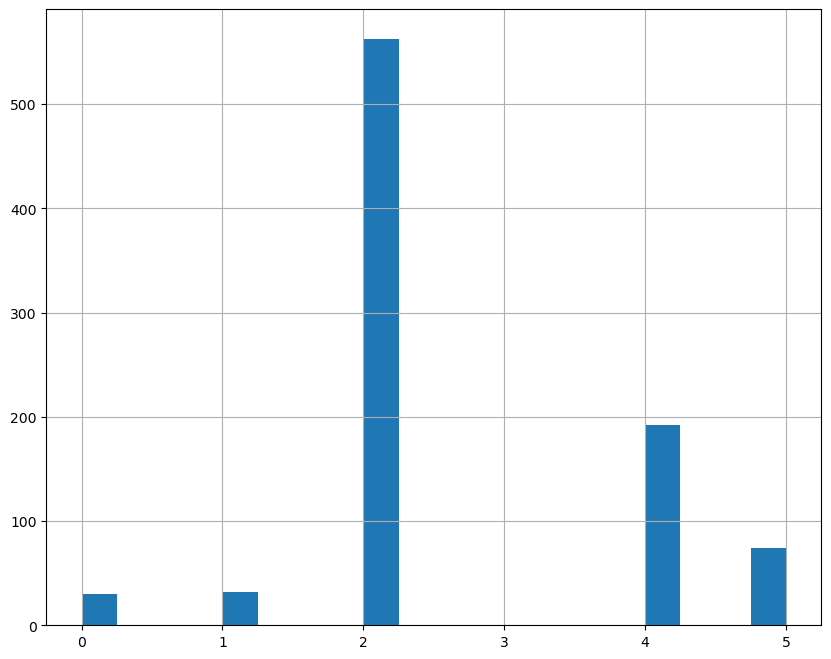

In [116]:
df['age_phase'].hist(bins=20,figsize=(10,8))

In [124]:
for phase in df['age_phase'].unique():
    
    print(age_cats[phase])
    phase_df = df[df['age_phase']==phase]
    survived = phase_df[phase_df['Survived'] ==1 ]
    survived_percentage = ( survived.shape[0]/phase_df.shape[0] )*100
    print(f"Survived of  {age_cats[phase]} :","%.2f" % survived_percentage,'%')
    print("Count: ",phase_df.shape[0])
    print("\n=======\n")

teen
Survived of  teen : 35.17 %
Count:  563


adult
Survived of  adult : 41.15 %
Count:  192


elder
Survived of  elder : 36.49 %
Count:  74


baby
Survived of  baby : 66.67 %
Count:  30


child
Survived of  child : 56.25 %
Count:  32


